## Day 12 - First naive backtest on Crossover with double EMAs

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.graph_objects as go   

In [3]:
"""
    :param ticker: closing prices
    :param start: history start date
    :param end: history end date
    :return: stock's historical data 
"""
def get_data(ticker,start="2018-03-25"):
    
    return yf.download(ticker, start)


"""
    :param close: closing prices
    :param length: moving average length
    :return: stock's exponential moving average (EMA)
    
"""
def get_EMA(close,length=20):
    return close.ewm(span=length, adjust=False).mean()

In [48]:
"""
    :param close: closing prices
    :param len_moving_average: moving average length
    :return buy: list with buy's signals (indexes)
    :return sell: list with sell's signals (indexes)
    :return df_signal_3: new dataframe that contains "close" and "ema(s)"
    :return balance: final balance after trading
"""
def trade_3(close, len_short_ma=20, len_long_ma=100, budget=10000):
    
    ma_short = get_EMA(close,length=len_short_ma)
    ma_long = get_EMA(close,length=len_long_ma)
    
    df_signal_3 = pd.DataFrame({'ma_short' : ma_short, 
                                'ma_long' : ma_long,
                                'close' : close}).dropna()
    
    buy = []
    sell = []
    
    # trade at most 30% of the total balance
    balance = budget 
    traded = 0
    traded_price = 0
    
    # pos = 0 : we do not have any position -> we can buy but we cannot sell
    # pos = 1 : we have a position -> we can sell and we cannot buy 
    
    # I am not considering trading fees
    # I suppose to trade the entire balance 
    pos = 0
    
    for i in range(len(df_signal_3)-1):
        
        if df_signal_3.ma_short.iloc[i-1] < df_signal_3.ma_long.iloc[i] \
        and df_signal_3.ma_short.iloc[i+1] > df_signal_3.ma_long.iloc[i] \
        and pos == 0:
            buy.append(i)
            pos = 1
            
            # update balance
            traded_price = df_signal_3.close[i]
            traded = balance
            balance = 0
            
            
        
        if df_signal_3.ma_short.iloc[i-1] > df_signal_3.ma_long.iloc[i] \
        and df_signal_3.ma_short.iloc[i+1] < df_signal_3.ma_long.iloc[i] \
        and pos == 1:
            sell.append(i)
            pos = 0
            
            # update balance
            balance += traded * (df_signal_3.close[i]/traded_price)
        
    # final price
    if pos == 1:
        balance += traded * (df_signal_3.close[len(df_signal_3)-1]/traded_price)
    
    return buy, sell, df_signal_3, balance

[*********************100%***********************]  1 of 1 completed


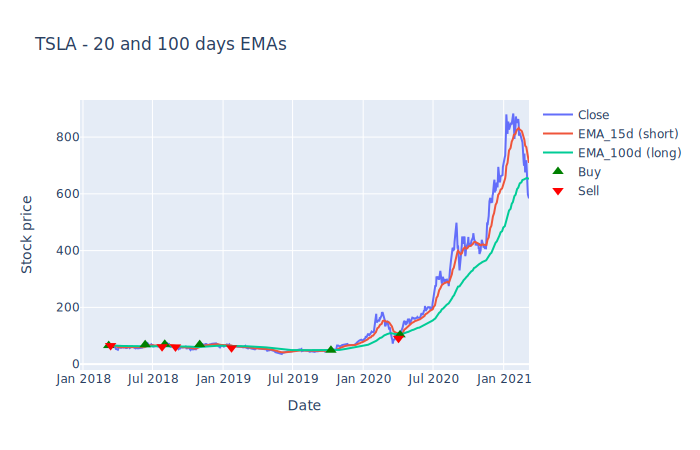

Traded 		: 10000
Balance 	: 68032.54
Net 		: 58032.54


In [80]:
trade = 10000

stock_history_3  = get_data('TSLA','2018-03-06')
stock_history_3 = stock_history_3['Adj Close']
buy_3, sell_3, df_signal_3, balance_3 = trade_3(stock_history_3, 20, 100, trade)

fig_s3 = go.Figure()
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['close'], name='Close'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_short'], name='EMA_15d (short)'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_long'], name='EMA_100d (long)'))


fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[buy_3].index, y=df_signal_3.iloc[buy_3]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[sell_3].index, y=df_signal_3.iloc[sell_3]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s3.update_layout(
    title="TSLA - 20 and 100 days EMAs",
    xaxis_title="Date",
    yaxis_title="Stock price"
)

# fig_s3.show()

# static rendering for github
fig_s3.show("svg")

print(f"Traded \t\t: {trade}")
print(f"Balance \t: {balance_3:.2f}")
print(f"Net \t\t: {balance_3 - trade :.2f}")

[*********************100%***********************]  1 of 1 completed


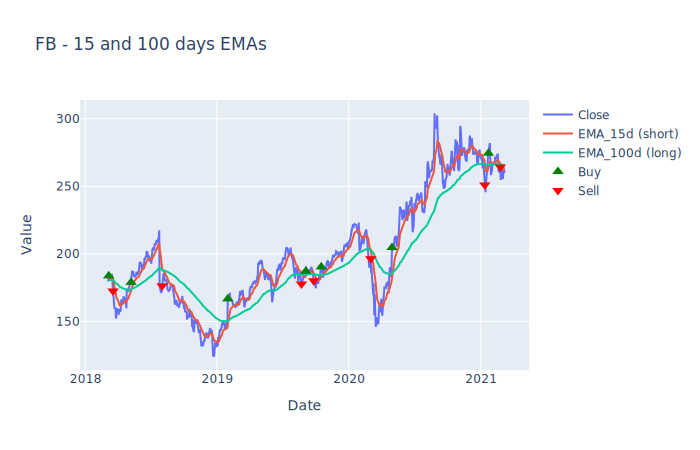

Traded 		: 10000
Balance 	: 11579.55
Net 		: 1579.55


In [79]:
trade = 10000

stock_history_3  = get_data('FB','2018-03-06')
stock_history_3 = stock_history_3['Adj Close']
buy_3, sell_3, df_signal_3, balance_3 = trade_3(stock_history_3, 15, 100, trade)

fig_s3 = go.Figure()
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['close'], name='Close'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_short'], name='EMA_15d (short)'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_long'], name='EMA_100d (long)'))


fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[buy_3].index, y=df_signal_3.iloc[buy_3]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[sell_3].index, y=df_signal_3.iloc[sell_3]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s3.update_layout(
    title="FB - 15 and 100 days EMAs",
    xaxis_title="Date",
    yaxis_title="Value"
)

#fig_s3.show()

#static rendering for github
fig_s3.show("svg")

print(f"Traded \t\t: {trade}")
print(f"Balance \t: {balance_3:.2f}")
print(f"Net \t\t: {balance_3 - trade :.2f}")

[*********************100%***********************]  1 of 1 completed


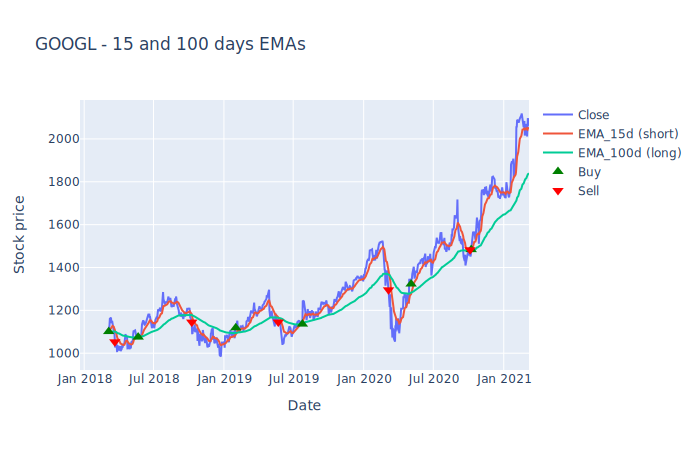

Traded 		: 10000
Balance 	: 18531.09
Net 		: 8531.09


In [78]:
trade = 10000

stock_history_3  = get_data('GOOGL','2018-03-06')
stock_history_3 = stock_history_3['Adj Close']
buy_3, sell_3, df_signal_3, balance_3 = trade_3(stock_history_3, 15, 100, trade)

fig_s3 = go.Figure()
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['close'], name='Close'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_short'], name='EMA_15d (short)'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_long'], name='EMA_100d (long)'))


fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[buy_3].index, y=df_signal_3.iloc[buy_3]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[sell_3].index, y=df_signal_3.iloc[sell_3]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s3.update_layout(
    title="GOOGL - 15 and 100 days EMAs",
    xaxis_title="Date",
    yaxis_title="Stock price"
)

#fig_s3.show()

#static rendering for github
fig_s3.show("svg")

print(f"Traded \t\t: {trade}")
print(f"Balance \t: {balance_3:.2f}")
print(f"Net \t\t: {balance_3 - trade :.2f}")

[*********************100%***********************]  1 of 1 completed


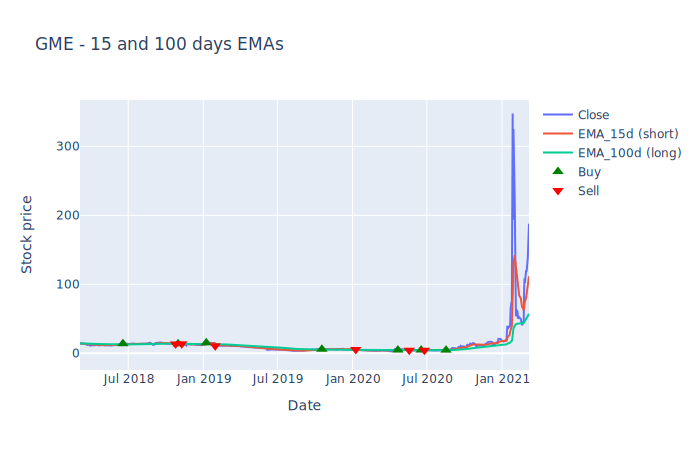

Traded 		: 10000
Balance 	: 227845.59
Net 		: 217845.59


In [77]:
trade = 10000

stock_history_3  = get_data('GME','2018-03-06')
stock_history_3 = stock_history_3['Adj Close']
buy_3, sell_3, df_signal_3, balance_3 = trade_3(stock_history_3, 15, 100, trade)

fig_s3 = go.Figure()
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['close'], name='Close'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_short'], name='EMA_15d (short)'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_long'], name='EMA_100d (long)'))


fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[buy_3].index, y=df_signal_3.iloc[buy_3]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[sell_3].index, y=df_signal_3.iloc[sell_3]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s3.update_layout(
    title="GME - 15 and 100 days EMAs",
    xaxis_title="Date",
    yaxis_title="Stock price"
)

#fig_s3.show()

#static rendering for github
fig_s3.show("svg")

print(f"Traded \t\t: {trade}")
print(f"Balance \t: {balance_3:.2f}")
print(f"Net \t\t: {balance_3 - trade :.2f}")